In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv('/content/drive/MyDrive/Sentiment_Analysis.csv', encoding='latin-1')
df.head()

,polarity of tweet,id of the tweet,date of the tweet,query,user,text of the tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [49]:
df.shape

(1048572, 6)

In [50]:
df.columns = ['sentiment','id','date','query','user','text']

In [51]:
sentiment_0_subset = df[df['sentiment'] == 0].head(25000)
sentiment_1_subset = df[df['sentiment'] == 4].head(25000)
result_df = pd.concat([sentiment_0_subset, sentiment_1_subset])
result_df.reset_index(drop=True, inplace=True)
df= result_df

In [52]:
df

,sentiment,id,date,query,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
49995,4,1556381057,Sat Apr 18 22:37:08 PDT 2009,NO_QUERY,ethanattack,Yup. Going to sleep. Night guys.
49996,4,1556381076,Sat Apr 18 22:37:06 PDT 2009,NO_QUERY,GinaLaGuardia,"@MsUnitedStates Thank you so, so, so, so much ..."
49997,4,1556381131,Sat Apr 18 22:37:09 PDT 2009,NO_QUERY,CarolCalazans,@tommcfly Hey Tom How are you? http://twitpic....
49998,4,1556381147,Sat Apr 18 22:37:07 PDT 2009,NO_QUERY,KKVegas,Teasing and Mack 1-0 are taking Vegas by storm...


## EDA

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  50000 non-null  int64 
 1   id         50000 non-null  int64 
 2   date       50000 non-null  object
 3   query      50000 non-null  object
 4   user       50000 non-null  object
 5   text       50000 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.3+ MB


In [54]:
df.describe()

,sentiment,id
count,50000.00000,5.000000e+04
mean,2.00000,1.518697e+09
std,2.00002,4.188174e+07
min,0.00000,1.467811e+09
25%,0.00000,1.468990e+09
50%,2.00000,1.550878e+09
75%,4.00000,1.554200e+09
max,4.00000,1.558188e+09


In [55]:
df.isnull().sum()

sentiment    0
id           0
date         0
query        0
user         0
text         0
dtype: int64

In [56]:
df['sentiment'] = df['sentiment'].replace({4:1})

In [57]:
import seaborn as sns

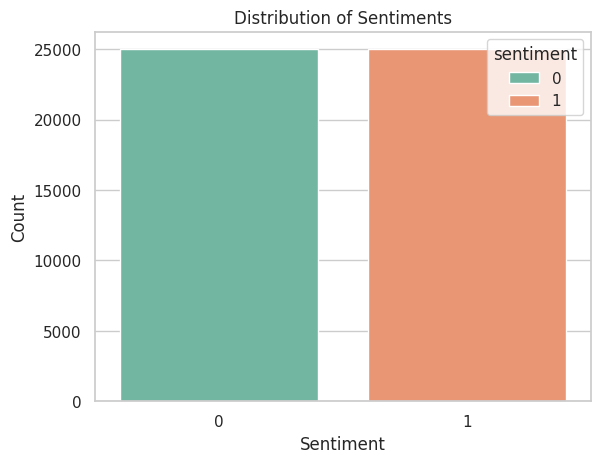

In [58]:
sns.set(style="whitegrid")

sns.countplot(data=df, x='sentiment', hue='sentiment', palette='Set2')

# Customize plot labels and title if needed
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')

# Show the plot
plt.show()

In [59]:
df['text'].isnull().sum()

0

In [60]:
df = df.drop_duplicates('text')

## Data Preprocessing

In [61]:
!pip install nltk

In [62]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [63]:
from nltk.tokenize import word_tokenize
import re
from nltk.stem import SnowballStemmer
from string import punctuation


stuff_to_be_removed = list(punctuation)

def text_preprocessing(text):
    text= str(text)

    text = text.lower()      #Uppercase to Lowercase

    text = re.sub(r"https\S+|www\S+|https\S+"," ",text,flags=re.MULTILINE)      #Removing links

    text=re.sub("(\\d|\\W)+"," ",text)
    text = re.sub(r'\@\w+|\#'," ",text)   #Removing @ and # Symbol

    text = re.sub(r'[^\w\s\`]'," ",text)  #Removing Other Symbols

    text_tokens = word_tokenize(text)
    lem = SnowballStemmer("english")
    text = [lem.stem(word) for word in text_tokens if not word in stuff_to_be_removed]
    text1 = " ".join(text)

    return text1

In [64]:
data_cleaned = pd.DataFrame()
df['text'] = df['text'].apply(text_preprocessing)
df['text'].head()

<ipython-input-64-9888a9a80508>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(text_preprocessing)


0    is upset that he can t updat his facebook by t...
1    kenichan i dive mani time for the ball manag t...
2         my whole bodi feel itchi and like it on fire
3    nationwideclass no it s not behav at all i m m...
4                          kwesidei not the whole crew
Name: text, dtype: object

In [65]:
negative_text = ' '.join(df[df['sentiment'] == 0]['text'])
positive_text = ' '.join(df[df['sentiment'] == 1]['text'])
df = df[['sentiment','text']]
df.head()

,sentiment,text
0,0,is upset that he can t updat his facebook by t...
1,0,kenichan i dive mani time for the ball manag t...
2,0,my whole bodi feel itchi and like it on fire
3,0,nationwideclass no it s not behav at all i m m...
4,0,kwesidei not the whole crew


## Convert Text into Vector

#### Since, the dataset is imbalanced, we also keep that in mind.

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [67]:
X = df['text']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [68]:
vectorization = TfidfVectorizer()
XV_train = vectorization.fit_transform(X_train)
XV_test = vectorization.transform(X_test)

## Model Training

### Baseline Model

In [69]:
score_baseline = df['sentiment'].value_counts(normalize=True).max()
score_baseline

0.5001004540523165

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score,classification_report, ConfusionMatrixDisplay

### Logistic Regression

In [73]:
lr = LogisticRegression(n_jobs=-1)
lr.fit(XV_train,y_train)

LogisticRegression(n_jobs=-1)

In [74]:
pred_lr=lr.predict(XV_test)

In [75]:
# getting accuracy score
score_lr = accuracy_score(y_test, pred_lr)
score_lr

0.7743847312908086

In [76]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      4932
           1       0.78      0.78      0.78      5023

    accuracy                           0.77      9955
   macro avg       0.77      0.77      0.77      9955
weighted avg       0.77      0.77      0.77      9955



### Random Forest Classifier

In [77]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(XV_train, y_train)

RandomForestClassifier(random_state=0)

In [78]:
pred_rfc = rfc.predict(XV_test)

In [79]:
score_rfc = rfc.score(XV_test, y_test)
score_rfc

0.7624309392265194

In [80]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77      4932
           1       0.78      0.74      0.76      5023

    accuracy                           0.76      9955
   macro avg       0.76      0.76      0.76      9955
weighted avg       0.76      0.76      0.76      9955



## Accuracy


#### The Random Forest gives 74% accuracy which is good

## Hyperparameter Tuning

#### Taking Very Much Time

In [81]:
# from sklearn.model_selection import GridSearchCV
# params={
#     'criterion':['gini', 'entropy', 'log_loss'],
#     'max_depth': [1,2,3,4,5],
#     'max_features': ['sqrt', 'log2', None],
#     'random_state':[0,42, 20]
# }
# clf= GridSearchCV(RandomForestClassifier(), param_grid= params, cv=5)
# clf.fit(XV_train, y_train)
# clf.best_params_

In [82]:
# rfc = RandomForestClassifier(random_state=0)
# rfc.fit(XV_train, y_train)
# pred_rfc = rfc.predict(XV_test)
# score_rfc = rfc.score(XV_test, y_test)
# print(classification_report(y_test, pred_gbc))

## Downsampling

#### Since, here it takes very long time so, I decided to go with first 25000 rows of boths cases

In [83]:
# from sklearn.utils import resample

# ## majority class 0
# df_majority = df[df['sentiment']==0]
# ## minority class 1
# df_minority = df[df['sentiment']==1]

# df_majority_downsampled = resample(df_majority,
#                                  replace=False,
#                                  n_samples=len(df_minority)//5,
#                                  random_state=134)

# df_minority_downsampled = resample(df_minority,
#                                  replace=False,
#                                  n_samples=len(df_minority)//5,
#                                  random_state=134)

In [84]:
# df_downsampled = pd.concat([df_majority_downsampled, df_minority_downsampled])

# X = df_downsampled['text']
# y = df_downsampled['sentiment']

# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# vectorization2 = TfidfVectorizer()
# XV_train = vectorization.fit_transform(X_train)
# XV_test = vectorization.transform(X_test)

# (XV_train.shape, XV_test.shape)

In [85]:
# sns.set(style="whitegrid")

# sns.countplot(data=df_downsampled, x='sentiment', hue='sentiment', palette='Set2')

# # Customize plot labels and title if needed
# plt.xlabel('Sentiment')
# plt.ylabel('Count')
# plt.title('Distribution of Sentiments')

# # Show the plot
# plt.show()

## Output Testing

In [86]:
def output_lable(n):
    if n == 0:
        return "The Text Sentement is Negative"
    elif n == 1:
        return "The Text Sentement is Positive"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(text_preprocessing)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_lr = lr.predict(new_xv_test)
    pred_rfc = rfc.predict(new_xv_test)

    return print((output_lable(pred_lr[0])))

In [87]:
# enter a text to find if its sentiment
text1 = "I am feeling good"
manual_testing(text1)

The Text Sentement is Positive


In [88]:
# enter a text to find if its sentiment
text2 = "I am feeling bad"
manual_testing(text2)

The Text Sentement is Negative


In [89]:
import pickle
pickle.dump(rfc, open('clf.pkl', 'wb'))
pickle.dump(vectorization, open('tfidf.pkl','wb'))

In [92]:
import sklearn

print(f"Scikit-learn version: {sklearn.__version__}")

Scikit-learn version: 1.2.2
